# The goal of this notebook is to create a new slighborhood map for Power BI

In [37]:
# Import info
import pandas as pd
import geopandas as gp

# Start with new SD ZIP Code shapefile
#df = gp.read_file('../ZIP_Codes.shp')
df = gp.read_file('../ZCTA2010.shp')

In [38]:
df = df[['ZCTA', 'geometry']]
display(df)

,ZCTA,geometry
0,94601,"POLYGON ((-195843.682 -22645.035, -195822.040 ..."
1,94501,"POLYGON ((-201604.187 -25728.139, -202894.954 ..."
2,94560,"POLYGON ((-181289.671 -49924.408, -181237.554 ..."
3,94587,"POLYGON ((-182052.317 -43764.050, -182037.584 ..."
4,94580,"POLYGON ((-187567.889 -34790.577, -187565.018 ..."
...,...,...
1764,95375,"POLYGON ((-671.656 19039.933, -674.106 19036.1..."
1765,95627,"POLYGON ((-179765.377 72302.075, -179786.761 7..."
1766,95607,"POLYGON ((-193956.110 99412.731, -193952.750 9..."
1767,95919,"POLYGON ((-112538.951 155528.122, -112549.979 ..."


<AxesSubplot:>

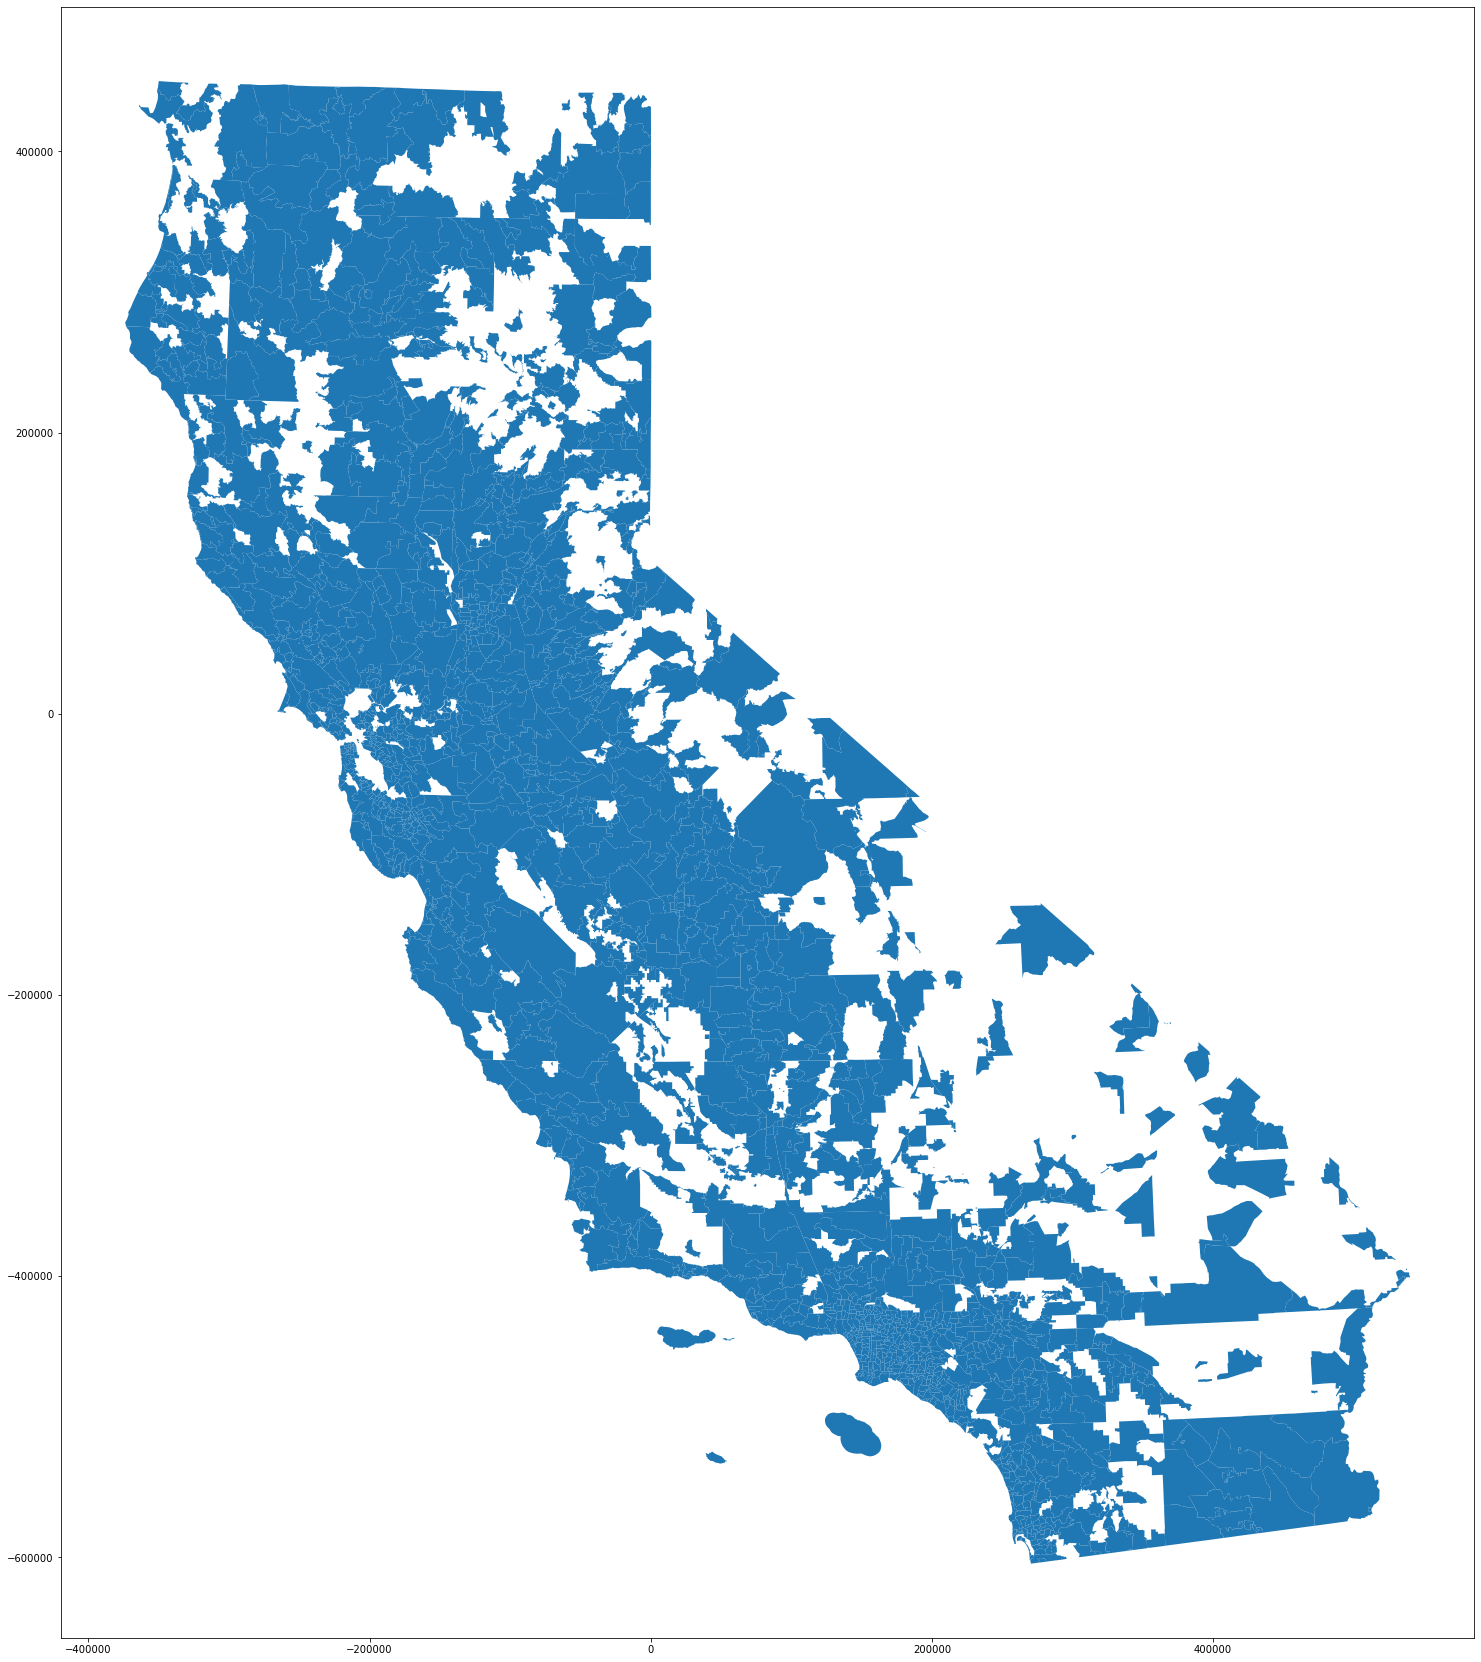

In [39]:
df.plot(figsize=(50,30))

In [53]:
# Map the neighborhoods based on zip code

from SD_Neighborhood_Mapping_Current import find_SD_neighborhood

df['neighborhood'] = df['ZCTA'].apply(lambda x : find_SD_neighborhood(int(x)))

display(df)

,ZCTA,geometry,neighborhood
0,94601,"POLYGON ((-195843.682 -22645.035, -195822.040 ...",None
1,94501,"POLYGON ((-201604.187 -25728.139, -202894.954 ...",None
2,94560,"POLYGON ((-181289.671 -49924.408, -181237.554 ...",None
3,94587,"POLYGON ((-182052.317 -43764.050, -182037.584 ...",None
4,94580,"POLYGON ((-187567.889 -34790.577, -187565.018 ...",None
...,...,...,...
1764,95375,"POLYGON ((-671.656 19039.933, -674.106 19036.1...",None
1765,95627,"POLYGON ((-179765.377 72302.075, -179786.761 7...",None
1766,95607,"POLYGON ((-193956.110 99412.731, -193952.750 9...",None
1767,95919,"POLYGON ((-112538.951 155528.122, -112549.979 ...",None


In [54]:
print(df['neighborhood'].unique())

[None 'Del Mar' 'El Cajon' 'Linda Vista' 'Mission Valley' 'La Jolla'
 'North Park' 'Otay Mesa' 'Rancho Santa Fe' 'Solana Beach'
 'Hillcrest, Mission Hills' 'Jamul' 'Spring Valley' 'Campo' 'Mount Laguna'
 'San Marcos' 'Carlsbad' 'Oceanside' 'Ocotillo' 'Fallbrook' 'Lakeside'
 'Pacific Beach, Mission Beach' 'Kensington, Normal Heights' 'Clairemont'
 'Chula Vista' 'Escondido' 'Jacumba' 'Bonsall' 'Golden Hill' 'Midway'
 'Palomar Mountain' 'Camp Pendleton' 'Allied Gardens, Del Cerro'
 'Carmel Valey' 'Guatay' 'Pine Valley' 'Potrero' 'University City'
 'Mira Mesa' 'La Mesa' 'National City' 'Cardiff by the Sea' 'Tecate'
 'Borrego Springs' 'Aguanga' 'Poway' 'Tierrasanta' 'Bonita' 'Pauma Valley'
 'Julian' 'Coronado' 'Vista' 'Ramona' 'San Carlos' 'Ocean Beach'
 'Valley Center' 'Imperial Beach' 'Santa Ysabel' 'Descanso' 'Dulzura'
 'Boulevard' 'City Heights' 'Encanto' 'Downtown' 'Sorrento Valley'
 'Rancho Bernardo' 'Encinitas' 'Morena' 'Paradise Hills' 'Warner Springs'
 'Pala' 'San Clemente' 'Santee

In [55]:
# Keep ZCTA in San Diego
SD_df = df.dropna(subset=['neighborhood'])
display(SD_df)

,ZCTA,geometry,neighborhood
159,92014,"MULTIPOLYGON (((255574.293 -555528.721, 255586...",Del Mar
160,92020,"POLYGON ((285596.041 -578695.036, 285594.227 -...",El Cajon
161,92111,"POLYGON ((265785.168 -572339.352, 265748.437 -...",Linda Vista
162,92108,"MULTIPOLYGON (((262896.806 -579699.170, 262896...",Mission Valley
163,92037,"POLYGON ((254759.209 -572625.546, 254743.387 -...",La Jolla
...,...,...,...
1715,91901,"POLYGON ((299632.581 -567814.814, 299634.545 -...",Alpine
1716,92115,"POLYGON ((275222.264 -581327.595, 275222.069 -...",College
1717,92145,"POLYGON ((277883.021 -561316.442, 277838.735 -...",Miramar
1718,92066,"POLYGON ((321977.053 -529257.402, 321968.159 -...",Ranchita


<AxesSubplot:>

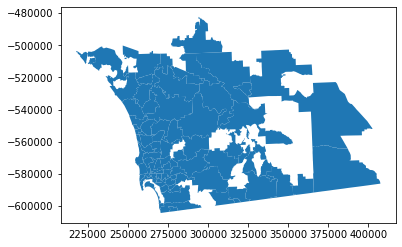

In [56]:
# Merge based on neighborhood

dissolved_df = df.dissolve(by='neighborhood')
dissolved_df.plot()

In [57]:
# Change projection
proj_df = dissolved_df.to_crs(crs=4269)
print(proj_df.crs)

epsg:4269


In [58]:
# Export for PowerBI
proj_df = proj_df.reset_index()

export_df = proj_df[['neighborhood', 'geometry']]

export_df = gp.GeoDataFrame(export_df, geometry='geometry')
export_df.to_file('../SD_Neighborhood_current.geojson', driver='GeoJSON')